## <span> International University Landscape and Trends </span>
### Project Goal: To analyze the geographical concentration of top universities, assess the international outlook of institutions, and identify patterns in global academic excellence.

#### <span> 1. Data Acquisition and Cleaning </span>

In [1]:
#importing the pandas library
import pandas as pd

In [2]:
df = pd.read_csv('University_Rankings_Data.csv', encoding='ISO-8859-1', dtype=str)
df.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)  # Remove non-ASCII chars
df.to_csv('University_Rankings_Data.csv', index=False, encoding='utf-8')

In [3]:
# Load the data
# df = pd.read_csv('University_Rankings_Data.csv')

In [4]:
#Understanding the data 
print("--- Initial Data Info ---")
df.shape #number of rows and columns

--- Initial Data Info ---


(3243, 9)

In [5]:
df.info() #information about datatype of values in different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3243 entries, 0 to 3242
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Rank                         3243 non-null   object
 1   University                   3243 non-null   object
 2   Location                     3243 non-null   object
 3   Overall Score                2510 non-null   object
 4   Overall Teaching Score       2510 non-null   object
 5   Research Score               2510 non-null   object
 6   Research Quality             2510 non-null   object
 7   Industry Income Score        2510 non-null   object
 8   International Outlook Score  2510 non-null   object
dtypes: object(9)
memory usage: 228.2+ KB


In [6]:
df.head() #display first 5 rows

,Rank,University,Location,Overall Score,Overall Teaching Score,Research Score,Research Quality,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,98.5,96.8,100.0,98.8,99.6,97.3
1,2,Massachusetts Institute of Technology,United States,98.1,99.2,96.0,99.7,100.0,93.8
2,3,Harvard University,United States,97.7,97.3,99.9,99.3,85.7,90.1
3,4,Princeton University,United States,97.5,98.3,98.0,98.9,96.9,87.4
4,5,University of Cambridge,United Kingdom,97.4,95.9,99.9,97.6,88.4,97.1


In [7]:
df.describe 

<bound method NDFrame.describe of      Rank                             University        Location  \
0       1                   University of Oxford  United Kingdom   
1       2  Massachusetts Institute of Technology   United States   
2       3                     Harvard University   United States   
3       4                   Princeton University   United States   
4       5                University of Cambridge  United Kingdom   
...   ...                                    ...             ...   
3238   21                  University of Toronto          Canada   
3239  =22                                    UCL  United Kingdom   
3240  =22       University of Michigan-Ann Arbor   United States   
3241   24             Carnegie Mellon University   United States   
3242   25               University of Washington   United States   

     Overall Score Overall Teaching Score Research Score Research Quality  \
0             98.5                   96.8          100.0             98.

In [8]:
print("\n--- number of Missing Values in each column Before Cleaning ---")
print(df.isnull().sum())


--- number of Missing Values in each column Before Cleaning ---
Rank                             0
University                       0
Location                         0
Overall Score                  733
Overall Teaching Score         733
Research Score                 733
Research Quality               733
Industry Income Score          733
International Outlook Score    733
dtype: int64


In [9]:
def range_to_average(rank_value):
 """Cleans Rank column and handles special cases one by one."""
 if isinstance(rank_value, str):
     rank_value = rank_value.strip()
     if '–' in rank_value: # en-dash for ranges
         # low, high = map(int, rank_value.split('–'))
         # return (low + high) / 2
         return rank_value
     if '+' in rank_value:
         return int(rank_value.replace('+', ''))
     if rank_value.startswith('='):
         return int(rank_value.lstrip('='))
     if rank_value.lower() == 'reporter':
         return "NaN"
 try:
     return int(rank_value)
 except (ValueError, TypeError):
     return np.nan

df['Rank'] = df['Rank'].apply(range_to_average)

In [10]:
df['Rank'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21,
       22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 55, 56, 58, 61, 62, 64,
       65, 66, 67, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 83, 84,
       87, 89, 90, 92, 93, 95, 97, 98, 100, 102, 104, 106, 107, 110, 112,
       115, 116, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 132,
       134, 136, 139, 140, 141, 143, 146, 149, 151, 152, 154, 157, 159,
       160, 162, 163, 166, 168, 171, 172, 175, 176, 178, 179, 180, 183,
       185, 188, 189, 191, 195, 196, 199, 201250, 251300, 301350, 351400,
       401500, 501600, 601800, 8011000, 10011200, 12011500, 1501, 'NaN'],
      dtype=object)

In [11]:
df['Overall Score'].unique()

array(['98.5', '98.1', '97.7', '97.5', '97.4', '97.2', '96.3', '94.5',
       '94.4', '94.1', '93.0', '92.5', '92.0', '90.9', '90.7', '89.9',
       '89.8', '89.2', '88.3', '87.7', '85.7', '83.8', '83.5', '83.4',
       '83.3', '82.5', '81.8', '81.4', '80.4', '80.3', '79.9', '79.6',
       '78.8', '78.7', '78.4', '78.3', '77.8', '77.7', '77.0', '76.8',
       '76.7', '76.5', '76.2', '76.1', '75.9', '75.8', '75.5', '75.2',
       '74.8', '73.8', '73.7', '73.5', '73.4', '73.0', '72.9', '72.7',
       '72.2', '71.6', '71.3', '71.0', '70.7', '70.6', '70.4', '70.3',
       '70.0', '69.9', '69.8', '69.5', '69.1', '68.0', '67.8', '67.6',
       '67.3', '67.2', '67.1', '66.9', '66.6', '66.3', '66.2', '66.1',
       '65.8', '65.7', '65.6', '65.5', '65.4', '65.3', '65.2', '65.0',
       '64.8', '64.7', '64.5', '64.4', '64.3', '64.2', '63.9', '63.8',
       '63.6', '63.2', '63.0', '62.7', '62.5', '62.4', '62.3', '62.2',
       '62.1', '62.0', '61.9', '61.8', '61.7', '61.4', '61.2', '61.1',
      

In [12]:
def clean_score_columns(series):
    cleaned_values = []

    for val in series:
        # Step 1: Handle missing or NaN
        if pd.isna(val) or str(val).strip().lower() in ['nan', '', 'na', 'none']:
            cleaned_values.append(0.0)
            continue

        val_str = str(val).strip()

        # Step 2: Handle range values with hyphen or en-dash
        if '-' in val_str or '–' in val_str:
            dash = '–' if '–' in val_str else '-'  # Detect actual dash used
            try:
                start, end = val_str.split(dash)
                median = (float(start.strip()) + float(end.strip())) / 2
                cleaned_values.append(round(median, 1))
            except:
                cleaned_values.append(0.0)  # fallback if split or float fails
        else:
            # Step 3: Try to convert regular float string
            try:
                cleaned_values.append(round(float(val_str), 1))
            except:
                cleaned_values.append(0.0)  # fallback if conversion fails

    return pd.Series(cleaned_values, dtype='float')

# Columns to apply the imputation to
cols_to_impute = [
    'Overall Score',
    'Overall Teaching Score',
    'Research Score',
    'Research Quality',
    'Industry Income Score',
    'International Outlook Score'
]

# Apply custom imputation to each column
for col in cols_to_impute:
    df[col] = clean_score_columns(df[col])

# Check results
print("\nMissing values after imputation:")
print(df[cols_to_impute].isnull().sum())

# Optional: check if everything looks clean
df['Overall Score'].unique()



Missing values after imputation:
Overall Score                  0
Overall Teaching Score         0
Research Score                 0
Research Quality               0
Industry Income Score          0
International Outlook Score    0
dtype: int64


array([98.5, 98.1, 97.7, 97.5, 97.4, 97.2, 96.3, 94.5, 94.4, 94.1, 93. ,
       92.5, 92. , 90.9, 90.7, 89.9, 89.8, 89.2, 88.3, 87.7, 85.7, 83.8,
       83.5, 83.4, 83.3, 82.5, 81.8, 81.4, 80.4, 80.3, 79.9, 79.6, 78.8,
       78.7, 78.4, 78.3, 77.8, 77.7, 77. , 76.8, 76.7, 76.5, 76.2, 76.1,
       75.9, 75.8, 75.5, 75.2, 74.8, 73.8, 73.7, 73.5, 73.4, 73. , 72.9,
       72.7, 72.2, 71.6, 71.3, 71. , 70.7, 70.6, 70.4, 70.3, 70. , 69.9,
       69.8, 69.5, 69.1, 68. , 67.8, 67.6, 67.3, 67.2, 67.1, 66.9, 66.6,
       66.3, 66.2, 66.1, 65.8, 65.7, 65.6, 65.5, 65.4, 65.3, 65.2, 65. ,
       64.8, 64.7, 64.5, 64.4, 64.3, 64.2, 63.9, 63.8, 63.6, 63.2, 63. ,
       62.7, 62.5, 62.4, 62.3, 62.2, 62.1, 62. , 61.9, 61.8, 61.7, 61.4,
       61.2, 61.1, 61. , 60.9, 60.8, 60.7, 60.6, 60.4, 60.2, 60.1, 59.9,
       59.8, 59.7, 59.6, 59.5, 59.4, 59.3, 59.2, 59.1, 58.9, 58.7,  0. ])

In [13]:
df.shape

(3243, 9)

In [14]:
# Check for number of duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

print("Shape After removing duplicates: ")
df.shape

Number of duplicate rows: 525
Shape After removing duplicates: 


(2718, 9)

In [15]:
df['Rank'] = range(1, 1+len(df))

In [16]:
df.to_csv('Cleaned_University_Rankings_Data.csv', index=False)

### <span> 2. Geographical and International Analysis </span>

In [17]:
# Step 2: Geographical and International Analysis

# 2.1 University Count by Country
university_count_by_country = df['Location'].value_counts().reset_index()
university_count_by_country.columns = ['Location', 'University Count']
print("\n--- University Count by Country (Top 10) ---")
print(university_count_by_country.head(10))


--- University Count by Country (Top 10) ---
         Location  University Count
0   United States               177
1  United Kingdom               158
2           Japan               144
3           India               133
4          Turkey               111
5        Pakistan                94
6           China                93
7            Iran                85
8         Algeria                82
9            Iraq                79


In [18]:
# 2.2 Average Scores by Country
average_scores_by_country = df.groupby('Location')[['Overall Score', 'International Outlook Score', 'Research Score']].mean().reset_index()
print("\n--- Average Overall and International Outlook Scores by Country (Top 10 by Overall Score) ---")
print(average_scores_by_country.sort_values(by='Overall Score', ascending=False).head(10))



--- Average Overall and International Outlook Scores by Country (Top 10 by Overall Score) ---
          Location  Overall Score  International Outlook Score  Research Score
101      Singapore      85.850000                    93.000000       86.450000
80     Netherlands      61.225000                    89.916667       55.058333
44       Hong Kong      61.216667                    97.500000       56.833333
111    Switzerland      38.818182                    89.463636       42.009091
30         Denmark      32.750000                    76.133333       45.300000
110         Sweden      30.245455                    72.890909       43.490909
10         Belgium      26.330000                    76.010000       45.610000
40         Germany      25.794118                    64.984314       43.813725
123  United States      23.389266                    55.442373       36.687006
5        Australia      18.470270                    85.083784       38.045946


In [19]:
# 2.3 Top Countries Analysis
# Consider universities in the top 100 ranks by 'Overall Score' for this analysis.
top_100_universities = df.sort_values(by='Overall Score', ascending=False).head(100)

top_countries_by_top_universities = top_100_universities['Location'].value_counts().reset_index()
top_countries_by_top_universities.columns = ['Location', 'Number of Top 100 Universities']
print("\n--- Countries with Most Top 100 Universities by Overall Score (Top 10) ---")
print(top_countries_by_top_universities.head(10))


--- Countries with Most Top 100 Universities by Overall Score (Top 10) ---
         Location  Number of Top 100 Universities
0   United States                              38
1  United Kingdom                              12
2           China                               7
3         Germany                               7
4       Australia                               6
5       Hong Kong                               5
6     Netherlands                               5
7          France                               4
8          Sweden                               3
9          Canada                               3


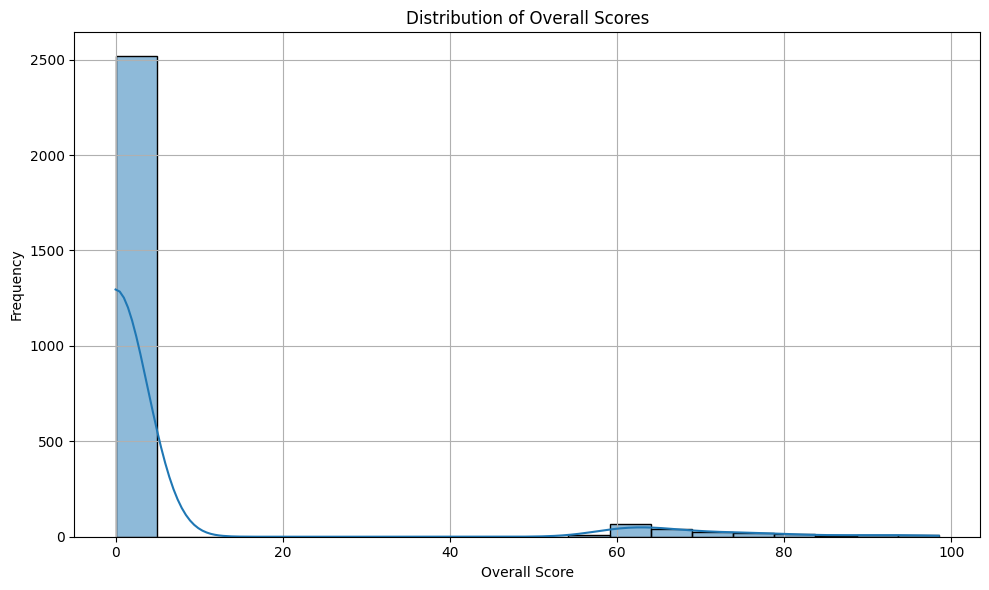

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv('Cleaned_University_Rankings_Data.csv')

# Define score metrics for easier iteration
score_metrics = [
    'Overall Score',
    'Overall Teaching Score',
    'Research Score',
    'Research Quality',
    'Industry Income Score',
    'International Outlook Score'
]

# --- 1. Distribution of overall scores ---
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Overall Score'], bins=20, kde=True)
plt.title('Distribution of Overall Scores')
plt.xlabel('Overall Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig('overall_score_distribution.png')
plt.show()

In [21]:
# --- 2. Top 10 universities in each metric ---
print("\n--- Top 10 Universities in Each Metric ---")
for metric in score_metrics:
    # Sort by the current metric in descending order and select the top 10
    top_10 = dataset.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 universities by {metric}:")
    print(top_10[['University', metric]].to_string(index=False)) # .to_string(index=False) for cleaner output



--- Top 10 Universities in Each Metric ---

Top 10 universities by Overall Score:
                           University  Overall Score
                 University of Oxford           98.5
Massachusetts Institute of Technology           98.1
                   Harvard University           97.7
                 Princeton University           97.5
              University of Cambridge           97.4
                  Stanford University           97.2
   California Institute of Technology           96.3
   University of California, Berkeley           94.5
              Imperial College London           94.4
                      Yale University           94.1

Top 10 universities by Overall Teaching Score:
                           University  Overall Teaching Score
Massachusetts Institute of Technology                    99.2
                 Princeton University                    98.3
                  Stanford University                    97.5
                   Harvard University 

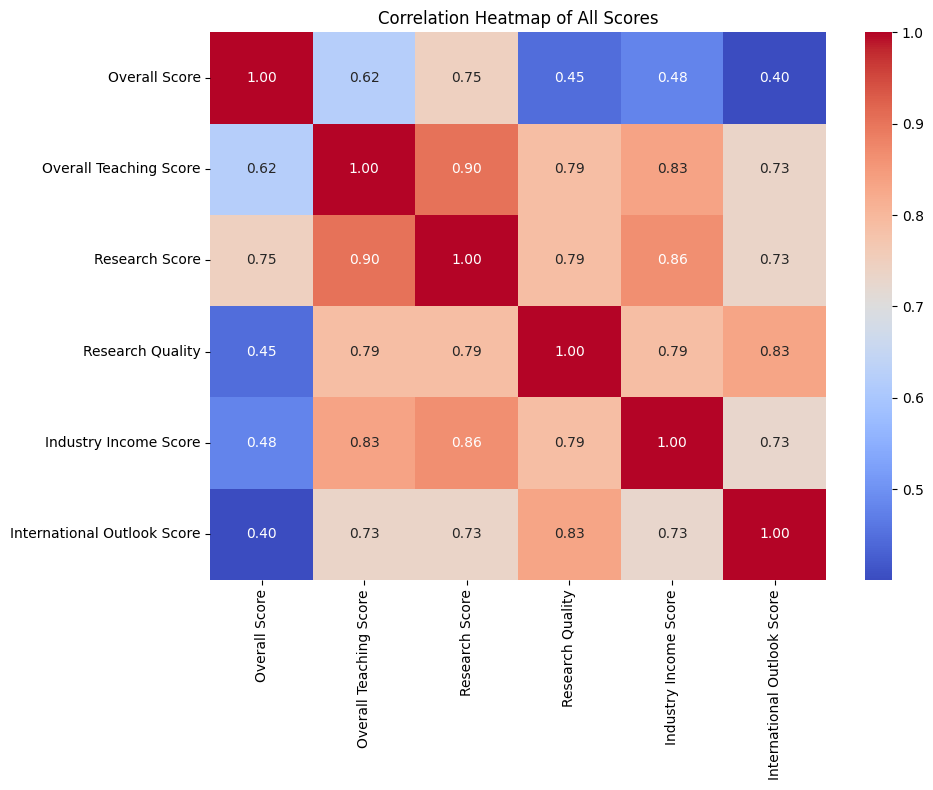

Generated 'correlation_heatmap.png'


In [22]:
# --- 3. Correlation heatmap of all scores ---
# Select only the score columns for correlation analysis
score_df = dataset[score_metrics]

plt.figure(figsize=(10, 8))
sns.heatmap(score_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Scores')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()
print("Generated 'correlation_heatmap.png'")

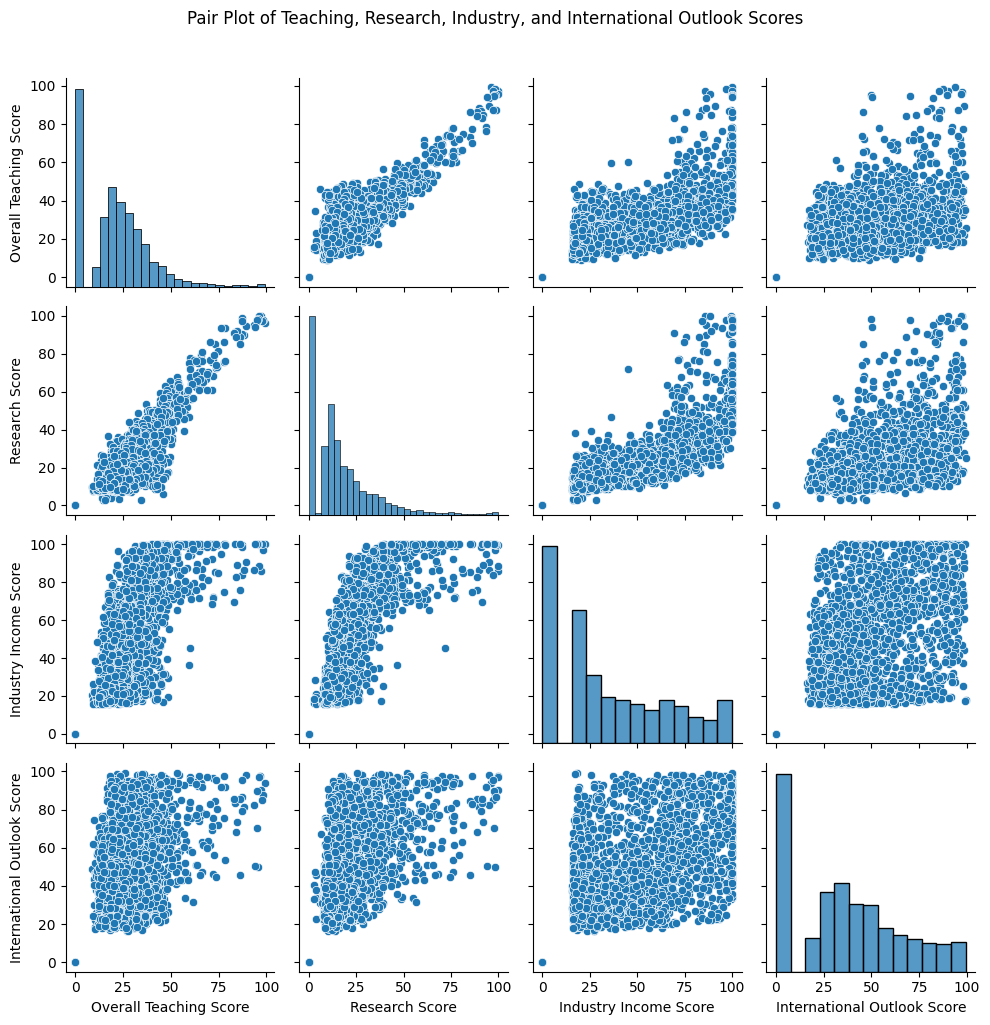

In [23]:
# --- 4. Relationship between Teaching vs Research vs Industry vs International Outlook ---

metrics_for_pairplot = [
    'Overall Teaching Score',
    'Research Score',
    'Industry Income Score',
    'International Outlook Score'
]

sns.pairplot(df[metrics_for_pairplot])
plt.suptitle('Pair Plot of Teaching, Research, Industry, and International Outlook Scores', y=1.02)
plt.tight_layout()
plt.savefig('pair_plot_scores.png')
plt.show()

In [24]:
# --- 5. Country-level breakdown: Average scores by country ---
# Group by 'Location' (country) and calculate the mean for all score metrics
average_scores_by_country = dataset.groupby('Location')[score_metrics].mean().sort_values(by='Overall Score', ascending=False)
print("\n--- Average Scores by Country ---")
average_scores_by_country.head(20)


--- Average Scores by Country ---


,Overall Score,Overall Teaching Score,Research Score,Research Quality,Industry Income Score,International Outlook Score
Location,,,,,,
Singapore,85.850000,72.100000,86.450000,95.100000,99.950000,93.000000
Netherlands,61.225000,44.908333,55.058333,86.933333,91.300000,89.916667
Hong Kong,61.216667,51.900000,56.833333,92.233333,92.416667,97.500000
Switzerland,38.818182,44.781818,42.009091,75.145455,78.200000,89.463636
Denmark,32.750000,37.800000,45.300000,82.750000,91.500000,76.133333
Sweden,30.245455,36.436364,43.490909,81.118182,75.500000,72.890909
Belgium,26.330000,37.380000,45.610000,77.010000,86.160000,76.010000
Germany,25.794118,40.747059,43.813725,74.329412,82.352941,64.984314
United States,23.389266,42.064972,36.687006,69.546893,65.859887,55.442373
